In [1]:
import numpy as np
import pandas as pd
import feather
import matplotlib.pyplot as plt
import gc
import os
import sys
import seaborn as sns
import datetime
import glob
pd.set_option('display.width', 1500)
pd.set_option('display.max_columns', 200)
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
!dir


HINO_Gear\ BearTemp\ 1\ (Gen).xlsx  HINO_Gen\ WindingTemp\ 2.xlsx
HINO_Gear\ BearTemp\ 2\ (Rot).xlsx  HINO_Gen\ WindingTemp\ 3.xlsx
HINO_Gear\ OilTemp\ Sump.xlsx	    HINO_LV\ Active\ Power.xlsx
HINO_Gen\ BearTemp\ (AS).xlsx	    HINO_MainBear\ Temp\ 1.xlsx
HINO_Gen\ BearTemp\ (BS).xlsx	    HINO_Wind\ Speed.xlsx
HINO_Gen\ RPMmonitor.xlsx	    Untitled.ipynb
HINO_Gen\ WindingTemp\ 1.xlsx


In [5]:
files = glob.glob('HINO*')

In [6]:
df = pd.read_excel(files[0])

In [7]:
df.head()

,Time stamp +/- 5 min.,HN 26-81849,HN 27-81870,HN 28-81869,HN 29-81872,HN 30-81873,HN 31-81848,HN 32-81868,HN 33-81859,HN 34-81871,...,HN 46-81864,HN 47-81863,HN 48-81852,HN 49-81862,HN 50-81860,HN 51-81861,HN 52-81857,HN 53-81856,HN 54-81858,HN 55-81850
0,2018-06-01 00:00:00,58.88,67.03,65.36,60.54,59.88,60.38,67.62,60.45,61.04,...,66.86,23.49,64.32,60.31,69.03,67.16,68.05,67.40,68.93,70.31
1,2018-06-01 00:10:00,59.90,66.36,64.68,60.67,59.91,60.24,66.48,60.42,60.85,...,65.95,23.49,66.03,61.82,66.52,68.82,66.28,69.23,70.24,68.58
2,2018-06-01 00:20:00,62.48,65.60,64.45,60.34,59.89,60.26,65.79,60.83,60.87,...,65.41,23.50,67.70,63.32,64.29,69.76,64.75,68.51,69.21,66.44
3,2018-06-01 00:30:00,65.49,65.09,63.79,60.17,59.67,60.16,65.02,60.79,60.73,...,64.35,23.50,69.48,65.01,62.13,67.71,63.73,66.36,67.47,64.37
4,2018-06-01 00:40:00,67.36,63.87,63.00,59.51,59.06,59.77,64.12,60.52,60.44,...,63.81,23.50,69.63,66.73,60.54,65.41,62.21,64.35,65.78,62.53


In [9]:
df.rename(columns = {df.columns[0]:'TimeStamp'},inplace=True)


In [35]:
df_final = pd.DataFrame()
count = 1
for file in files:
    print(file)
    temp = pd.read_excel(file)
    temp.rename(columns = {temp.columns[0]:'TimeStamp'},inplace=True)
    temp = temp.melt(id_vars = ['TimeStamp'], value_vars= temp.columns[1:],value_name = file.split('.')[0])
    temp.rename(columns = {'variable':'Device'},inplace=True)
    temp['key'] = temp['TimeStamp'].map(str) + '*' +temp['Device'] 
    
    if count >1:
        temp.drop(['TimeStamp','Device'],axis=1,inplace=True)
        df_final = pd.merge(df_final,temp,how='outer',left_on='key',right_on='key')
        
    else:
        df_final = pd.concat([df_final,temp])
    #print(df_final.columns)
    count +=1

HINO_Gen WindingTemp 1.xlsx
Index(['TimeStamp', 'Device', 'HINO_Gen WindingTemp 1', 'key'], dtype='object')
HINO_LV Active Power.xlsx
Index(['TimeStamp', 'Device', 'HINO_Gen WindingTemp 1', 'key',
       'HINO_LV Active Power'],
      dtype='object')
HINO_Wind Speed.xlsx
Index(['TimeStamp', 'Device', 'HINO_Gen WindingTemp 1', 'key',
       'HINO_LV Active Power', 'HINO_Wind Speed'],
      dtype='object')
HINO_Gear BearTemp 1 (Gen).xlsx
Index(['TimeStamp', 'Device', 'HINO_Gen WindingTemp 1', 'key',
       'HINO_LV Active Power', 'HINO_Wind Speed',
       'HINO_Gear BearTemp 1 (Gen)'],
      dtype='object')
HINO_Gen RPMmonitor.xlsx
Index(['TimeStamp', 'Device', 'HINO_Gen WindingTemp 1', 'key',
       'HINO_LV Active Power', 'HINO_Wind Speed', 'HINO_Gear BearTemp 1 (Gen)',
       'HINO_Gen RPMmonitor'],
      dtype='object')
HINO_Gear BearTemp 2 (Rot).xlsx
Index(['TimeStamp', 'Device', 'HINO_Gen WindingTemp 1', 'key',
       'HINO_LV Active Power', 'HINO_Wind Speed', 'HINO_Gear BearTemp 1

In [36]:
#temp.drop(['TimeStamp','Device'],axis =1)

In [37]:
df_final.head()

,TimeStamp,Device,HINO_Gen WindingTemp 1,key,HINO_LV Active Power,HINO_Wind Speed,HINO_Gear BearTemp 1 (Gen),HINO_Gen RPMmonitor,HINO_Gear BearTemp 2 (Rot),HINO_Gen WindingTemp 3,HINO_MainBear Temp 1,HINO_Gen BearTemp (BS),HINO_Gen BearTemp (AS),HINO_Gear OilTemp Sump,HINO_Gen WindingTemp 2
0,2018-06-01 00:00:00,HN 26-81849,58.88,2018-06-01 00:00:00*HN 26-81849,492.83,6.44,69.33,1079.67,62.75,59.99,38.67,46.56,43.89,58.50,59.69
1,2018-06-01 00:10:00,HN 26-81849,59.90,2018-06-01 00:10:00*HN 26-81849,630.07,7.16,71.07,1157.64,64.00,60.94,38.60,46.75,44.03,61.92,60.69
2,2018-06-01 00:20:00,HN 26-81849,62.48,2018-06-01 00:20:00*HN 26-81849,716.45,7.47,71.04,1205.80,63.84,63.36,38.60,47.57,44.99,59.04,63.17
3,2018-06-01 00:30:00,HN 26-81849,65.49,2018-06-01 00:30:00*HN 26-81849,651.38,7.22,71.29,1163.46,63.94,66.24,38.62,48.50,46.20,59.57,66.09
4,2018-06-01 00:40:00,HN 26-81849,67.36,2018-06-01 00:40:00*HN 26-81849,429.73,6.29,69.84,1042.45,62.85,67.99,38.66,49.37,47.46,58.58,67.86


In [39]:
df_final = df_final.drop(['key'],axis=1)

In [40]:
df_final['TimeStamp'] =pd.to_datetime(df_final['TimeStamp'])

In [41]:
feather.write_dataframe(df_final,'HINO_10min_data.feather')

In [2]:
df = feather.read_dataframe('HINO_10min_data.feather')

In [3]:
df.head()

,TimeStamp,Device,HINO_Gen WindingTemp 1,HINO_LV Active Power,HINO_Wind Speed,HINO_Gear BearTemp 1 (Gen),HINO_Gen RPMmonitor,HINO_Gear BearTemp 2 (Rot),HINO_Gen WindingTemp 3,HINO_MainBear Temp 1,HINO_Gen BearTemp (BS),HINO_Gen BearTemp (AS),HINO_Gear OilTemp Sump,HINO_Gen WindingTemp 2
0,2018-06-01 00:00:00,HN 26-81849,58.88,492.83,6.44,69.33,1079.67,62.75,59.99,38.67,46.56,43.89,58.50,59.69
1,2018-06-01 00:10:00,HN 26-81849,59.90,630.07,7.16,71.07,1157.64,64.00,60.94,38.60,46.75,44.03,61.92,60.69
2,2018-06-01 00:20:00,HN 26-81849,62.48,716.45,7.47,71.04,1205.80,63.84,63.36,38.60,47.57,44.99,59.04,63.17
3,2018-06-01 00:30:00,HN 26-81849,65.49,651.38,7.22,71.29,1163.46,63.94,66.24,38.62,48.50,46.20,59.57,66.09
4,2018-06-01 00:40:00,HN 26-81849,67.36,429.73,6.29,69.84,1042.45,62.85,67.99,38.66,49.37,47.46,58.58,67.86


In [7]:
np.array(df.columns)

array(['TimeStamp', 'Device', 'HINO_Gen WindingTemp 1',
       'HINO_LV Active Power', 'HINO_Wind Speed',
       'HINO_Gear BearTemp 1 (Gen)', 'HINO_Gen RPMmonitor',
       'HINO_Gear BearTemp 2 (Rot)', 'HINO_Gen WindingTemp 3',
       'HINO_MainBear Temp 1', 'HINO_Gen BearTemp (BS)',
       'HINO_Gen BearTemp (AS)', 'HINO_Gear OilTemp Sump',
       'HINO_Gen WindingTemp 2'], dtype=object)

In [9]:
map_dict = {'HINO_Gen WindingTemp 1'    :'GenWindingTemp1_Avg',
           'HINO_Gen WindingTemp 2'     :'GenWindingTemp2_Avg',
           'HINO_LV Active Power'       :'ActivePower_Avg',
           'HINO_Wind Speed'            :'WindSpd_Avg',
           'HINO_Gear BearTemp 1 (Gen)' :'GearBrgTemp_Avg',
            'HINO_Gear BearTemp 2 (Rot)':'GearBrgTemp2_Avg',
           'HINO_Gen RPMmonitor'        :'GenSpeed_Avg',
           'HINO_Gen WindingTemp 3'     :'GenWindingTemp3_Avg',
           'HINO_MainBear Temp 1'       :'MainBearingTemp_Avg',
           'HINO_Gen BearTemp (BS)'     :'BearingBTemp_Avg',
           'HINO_Gen BearTemp (AS)'     :'BearingATemp_Avg',
           'HINO_Gear OilTemp Sump'     :'GBOilTemp_Avg'}

In [10]:
df.rename(columns=map_dict,inplace=True)

In [11]:
df.head()

,TimeStamp,Device,GenWindingTemp1_Avg,ActivePower_Avg,WindSpd_Avg,GearBrgTemp_Avg,GenSpeed_Avg,GearBrgTemp2_Avg,GenWindingTemp3_Avg,MainBearingTemp_Avg,BearingBTemp_Avg,BearingATemp_Avg,GBOilTemp_Avg,GenWindingTemp2_Avg
0,2018-06-01 00:00:00,HN 26-81849,58.88,492.83,6.44,69.33,1079.67,62.75,59.99,38.67,46.56,43.89,58.50,59.69
1,2018-06-01 00:10:00,HN 26-81849,59.90,630.07,7.16,71.07,1157.64,64.00,60.94,38.60,46.75,44.03,61.92,60.69
2,2018-06-01 00:20:00,HN 26-81849,62.48,716.45,7.47,71.04,1205.80,63.84,63.36,38.60,47.57,44.99,59.04,63.17
3,2018-06-01 00:30:00,HN 26-81849,65.49,651.38,7.22,71.29,1163.46,63.94,66.24,38.62,48.50,46.20,59.57,66.09
4,2018-06-01 00:40:00,HN 26-81849,67.36,429.73,6.29,69.84,1042.45,62.85,67.99,38.66,49.37,47.46,58.58,67.86


In [22]:
feather.write_dataframe(df,'HINO_10min_data.feather')

In [14]:
','.join(list(df.columns))

'TimeStamp,Device,GenWindingTemp1_Avg,ActivePower_Avg,WindSpd_Avg,GearBrgTemp_Avg,GenSpeed_Avg,GearBrgTemp2_Avg,GenWindingTemp3_Avg,MainBearingTemp_Avg,BearingBTemp_Avg,BearingATemp_Avg,GBOilTemp_Avg,GenWindingTemp2_Avg'

In [20]:
#df['new_device']
df['Device']=df['Device'].apply(lambda x : x.split('-')[0])

In [21]:
df.head()

,TimeStamp,Device,GenWindingTemp1_Avg,ActivePower_Avg,WindSpd_Avg,GearBrgTemp_Avg,GenSpeed_Avg,GearBrgTemp2_Avg,GenWindingTemp3_Avg,MainBearingTemp_Avg,BearingBTemp_Avg,BearingATemp_Avg,GBOilTemp_Avg,GenWindingTemp2_Avg
0,2018-06-01 00:00:00,HN 26,58.88,492.83,6.44,69.33,1079.67,62.75,59.99,38.67,46.56,43.89,58.50,59.69
1,2018-06-01 00:10:00,HN 26,59.90,630.07,7.16,71.07,1157.64,64.00,60.94,38.60,46.75,44.03,61.92,60.69
2,2018-06-01 00:20:00,HN 26,62.48,716.45,7.47,71.04,1205.80,63.84,63.36,38.60,47.57,44.99,59.04,63.17
3,2018-06-01 00:30:00,HN 26,65.49,651.38,7.22,71.29,1163.46,63.94,66.24,38.62,48.50,46.20,59.57,66.09
4,2018-06-01 00:40:00,HN 26,67.36,429.73,6.29,69.84,1042.45,62.85,67.99,38.66,49.37,47.46,58.58,67.86


# PoseidonData


In [19]:
df = pd.read_csv('PoseidonData/WTG029_DM4500.csv')

In [32]:
big_df = pd.DataFrame()
for file in glob.glob('PoseidonData/WTG'+'*.csv'):
    print(file)
    temp = pd.read_csv(file)
    temp['TimeStamp'] = temp['Date'].map(str)+' '+temp['Time'].map(str)
    temp['Device'] = 'HN '+ file[17:19]
    big_df = pd.concat([big_df,temp],ignore_index=True)

PoseidonData/WTG053_DM4500.csv
PoseidonData/WTG036_DM4500.csv
PoseidonData/WTG029_DM4500.csv
PoseidonData/WTG040_DM4500.csv
PoseidonData/WTG030_DM4500.csv
PoseidonData/WTG034_DM4500.csv


In [37]:
big_df.head()

,Windows,Date,Time,dmFeLt100,dmFe100_200,dmFe200_300,dmFe300_400,dmFe400_500,dmFe500_600,dmFe600_700,...,dmAvg_700_400,dmAvg_400_200,dmFlowRate,dmBoardTemp,dmFeConcRaw,dmNfeConcRaw,flowMeter,dm1HrFeConcRaw,TimeStamp,Device
0,43120.819954,1/20/18,2:40:44 PM,4854.0,3978.0,643.0,100.0,20.0,18.0,9.0,...,NaN,NaN,0.00,62.0,NaN,NaN,NaN,NaN,2018-01-20 14:40:44,HN 53
1,43120.826898,1/20/18,2:50:44 PM,4854.0,3979.0,643.0,100.0,20.0,18.0,9.0,...,NaN,NaN,13.52,63.0,NaN,NaN,NaN,NaN,2018-01-20 14:50:44,HN 53
2,43120.833843,1/20/18,3:00:44 PM,4854.0,3979.0,643.0,100.0,20.0,18.0,9.0,...,NaN,NaN,0.00,63.0,NaN,NaN,NaN,NaN,2018-01-20 15:00:44,HN 53
3,43120.840787,1/20/18,3:10:44 PM,4854.0,3979.0,643.0,100.0,20.0,18.0,9.0,...,NaN,NaN,0.00,62.0,NaN,NaN,NaN,NaN,2018-01-20 15:10:44,HN 53
4,43120.847731,1/20/18,3:20:44 PM,4854.0,3979.0,643.0,100.0,20.0,18.0,9.0,...,NaN,NaN,0.00,61.0,NaN,NaN,NaN,NaN,2018-01-20 15:20:44,HN 53


In [42]:
big_df['TimeStamp'] =  pd.to_datetime(big_df['TimeStamp'])

In [36]:
big_df.to_csv('PoseidonData/HINO_Pos.csv',index=None)

In [21]:
df_big = pd.read_csv('PoseidonData/HINO_Pos.csv')

In [22]:
np.array(df_big.columns)

array(['Windows', 'Date', 'Time', 'dmFeLt100', 'dmFe100_200',
       'dmFe200_300', 'dmFe300_400', 'dmFe400_500', 'dmFe500_600',
       'dmFe600_700', 'dmFeGt700', 'dmNfeLt200', 'dmNfe200_300',
       'dmNfe300_400', 'dmNfe400_500', 'dmNfe500_600', 'dmNfe600_700',
       'dmNfe700_800', 'dmNfeGt800', 'feInstConc', 'nfeInstConc',
       'fe1HrConc', 'nfe1HrConc', 'fe24Conc', 'nfe24Conc',
       'feAutoCumMass', 'nfeAutoCumMass', 'dmRatio_700_200',
       'dmAvg_700_200', 'dmAvg_700_400', 'dmAvg_400_200', 'dmFlowRate',
       'dmBoardTemp', 'dmFeConcRaw', 'dmNfeConcRaw', 'flowMeter',
       'dm1HrFeConcRaw', 'TimeStamp', 'Device'], dtype=object)

In [36]:
df_big.isna().sum()/df_big.shape[0]

Windows            0.000000
Date               0.000000
Time               0.000000
dmFeLt100          0.000035
dmFe100_200        0.000032
dmFe200_300        0.000030
dmFe300_400        0.000027
dmFe400_500        0.000024
dmFe500_600        0.000027
dmFe600_700        0.000027
dmFeGt700          0.000030
dmNfeLt200         0.000024
dmNfe200_300       0.000030
dmNfe300_400       0.000024
dmNfe400_500       0.000027
dmNfe500_600       0.000030
dmNfe600_700       0.000030
dmNfe700_800       0.000024
dmNfeGt800         0.000024
feInstConc         0.008187
nfeInstConc        0.008187
fe1HrConc          0.005985
nfe1HrConc         0.005985
fe24Conc           0.007712
nfe24Conc          0.007712
feAutoCumMass      0.000035
nfeAutoCumMass     0.000035
dmRatio_700_200    0.994986
dmAvg_700_200      0.483236
dmAvg_700_400      0.621829
dmAvg_400_200      0.621835
dmFlowRate         0.000032
dmBoardTemp        0.000024
dmFeConcRaw        1.000000
dmNfeConcRaw       1.000000
flowMeter          1

In [41]:
df_big[['fe1HrConc','fe24Conc','nfe1HrConc','nfe24Conc','Device','TimeStamp']].describe()

,fe1HrConc,fe24Conc,nfe1HrConc,nfe24Conc
count,336792.000000,336207.000000,336792.000000,336207.000000
mean,5.830220,5.796398,0.014615,0.014862
std,34.562952,21.336743,0.497045,0.176506
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.017008,0.000000,0.000000
50%,0.014289,0.113906,0.000000,0.000000
75%,0.575000,2.496963,0.000000,0.000000
max,4039.140271,451.993798,91.841155,4.667446


In [34]:
df_big.dropna(thresh=df_big.shape[0]*0.5,axis=1).describe()

,Windows,dmFeLt100,dmFe100_200,dmFe200_300,dmFe300_400,dmFe400_500,dmFe500_600,dmFe600_700,dmFeGt700,dmNfeLt200,dmNfe200_300,dmNfe300_400,dmNfe400_500,dmNfe500_600,dmNfe600_700,dmNfe700_800,dmNfeGt800,feInstConc,nfeInstConc,fe1HrConc,nfe1HrConc,fe24Conc,nfe24Conc,feAutoCumMass,nfeAutoCumMass,dmAvg_700_200,dmFlowRate,dmBoardTemp
count,338820.000000,3.388080e+05,3.388090e+05,338810.000000,338811.000000,338812.000000,338811.000000,338811.000000,338810.000000,338812.000000,338810.000000,338812.000000,338811.000000,338810.000000,338810.000000,338812.0,338812.0,336046.000000,336046.000000,336792.000000,336792.000000,336207.000000,336207.000000,338808.000000,338808.000000,175090.000000,338809.000000,338812.000000
mean,43244.590716,2.795111e+05,1.727998e+05,11201.910569,1404.801831,360.569555,208.358569,103.643964,173.293521,0.199113,20.337756,13.193665,0.172745,0.006626,0.002211,0.0,0.0,5.903313,0.014917,5.830220,0.014615,5.796398,0.014862,1864.887936,2.125987,3.300207,4.809347,58.682963
std,147.294537,6.549495e+05,4.085458e+05,21271.548114,2032.798452,519.281720,310.621455,160.277610,291.067685,0.399334,91.344277,59.119203,0.813106,0.081131,0.046966,0.0,0.0,44.983595,1.179553,34.562952,0.497045,21.336743,0.176506,3114.385384,9.510852,5.997015,7.728042,7.907525
min,42922.661863,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000174,0.000000,6.000000
25%,43127.957972,2.979000e+03,9.560000e+02,48.000000,5.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.017008,0.000000,13.141000,0.000000,0.250005,0.000000,55.000000
50%,43246.121505,2.167300e+04,9.647000e+03,1909.000000,291.000000,67.000000,41.000000,21.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.014289,0.000000,0.113906,0.000000,289.303000,0.000000,2.380952,0.000000,60.000000
75%,43367.130295,4.271500e+04,4.501100e+04,11409.000000,3077.000000,763.000000,386.000000,183.000000,182.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.150000,0.000000,0.575000,0.000000,2.496963,0.000000,2877.816125,0.004000,5.769231,9.610000,64.000000
max,43501.825127,2.464488e+06,1.489439e+06,77790.000000,9271.000000,2208.000000,1260.000000,608.000000,1256.000000,1.000000,483.000000,301.000000,4.000000,1.000000,1.000000,0.0,0.0,8261.150000,547.088186,4039.140271,91.841155,451.993798,4.667446,11276.620000,48.988000,700.000000,54.110000,74.000000


In [23]:
df_big.describe()

,Windows,dmFeLt100,dmFe100_200,dmFe200_300,dmFe300_400,dmFe400_500,dmFe500_600,dmFe600_700,dmFeGt700,dmNfeLt200,dmNfe200_300,dmNfe300_400,dmNfe400_500,dmNfe500_600,dmNfe600_700,dmNfe700_800,dmNfeGt800,feInstConc,nfeInstConc,fe1HrConc,nfe1HrConc,fe24Conc,nfe24Conc,feAutoCumMass,nfeAutoCumMass,dmRatio_700_200,dmAvg_700_200,dmAvg_700_400,dmAvg_400_200,dmFlowRate,dmBoardTemp,dmFeConcRaw,dmNfeConcRaw,flowMeter,dm1HrFeConcRaw
count,338820.000000,3.388080e+05,3.388090e+05,338810.000000,338811.000000,338812.000000,338811.000000,338811.000000,338810.000000,338812.000000,338810.000000,338812.000000,338811.000000,338810.000000,338810.000000,338812.0,338812.0,336046.000000,336046.000000,336792.000000,336792.000000,336207.000000,336207.000000,338808.000000,338808.000000,1699.000000,175090.000000,128132.000000,128130.000000,338809.000000,338812.000000,0.0,0.0,0.0,0.0
mean,43244.590716,2.795111e+05,1.727998e+05,11201.910569,1404.801831,360.569555,208.358569,103.643964,173.293521,0.199113,20.337756,13.193665,0.172745,0.006626,0.002211,0.0,0.0,5.903313,0.014917,5.830220,0.014615,5.796398,0.014862,1864.887936,2.125987,0.034252,3.300207,51.026984,6.023250,4.809347,58.682963,NaN,NaN,NaN,NaN
std,147.294537,6.549495e+05,4.085458e+05,21271.548114,2032.798452,519.281720,310.621455,160.277610,291.067685,0.399334,91.344277,59.119203,0.813106,0.081131,0.046966,0.0,0.0,44.983595,1.179553,34.562952,0.497045,21.336743,0.176506,3114.385384,9.510852,0.022843,5.997015,45.272740,8.203372,7.728042,7.907525,NaN,NaN,NaN,NaN
min,42922.661863,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002897,-0.000174,0.000000,-0.000162,0.000000,6.000000,NaN,NaN,NaN,NaN
25%,43127.957972,2.979000e+03,9.560000e+02,48.000000,5.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.017008,0.000000,13.141000,0.000000,0.017580,0.250005,18.382727,1.363016,0.000000,55.000000,NaN,NaN,NaN,NaN
50%,43246.121505,2.167300e+04,9.647000e+03,1909.000000,291.000000,67.000000,41.000000,21.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.014289,0.000000,0.113906,0.000000,289.303000,0.000000,0.032864,2.380952,63.449935,3.481246,0.000000,60.000000,NaN,NaN,NaN,NaN
75%,43367.130295,4.271500e+04,4.501100e+04,11409.000000,3077.000000,763.000000,386.000000,183.000000,182.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.150000,0.000000,0.575000,0.000000,2.496963,0.000000,2877.816125,0.004000,0.051364,5.769231,77.777778,10.385442,9.610000,64.000000,NaN,NaN,NaN,NaN
max,43501.825127,2.464488e+06,1.489439e+06,77790.000000,9271.000000,2208.000000,1260.000000,608.000000,1256.000000,1.000000,483.000000,301.000000,4.000000,1.000000,1.000000,0.0,0.0,8261.150000,547.088186,4039.140271,91.841155,451.993798,4.667446,11276.620000,48.988000,0.067773,700.000000,700.000000,400.000000,54.110000,74.000000,NaN,NaN,NaN,NaN


In [43]:
df_big['TimeStamp'].min(),df_big['TimeStamp'].max()

('2017-07-06 11:53:05', '2019-02-05 14:48:11')

In [ ]:
def heat_map_plot(df,xvar,timeperiod='15d',figl=12,figw=20,folderloc=None,mean=False,count=False,
                 show_plots=False,vmax=None,vmin=None,cmap='Reds'):
    if mean:
        temp = pd.DataFrame(df.groupby(by=[pd.Grouper(key='TimeStamp',freq=timeperiod),
                                                 'Device'])[xvar].mean()).reset_index()
    if count:
        temp = pd.DataFrame(df.groupby(by=[pd.Grouper(key='TimeStamp',freq=timeperiod),
                                                 'Device'])[xvar].count()).reset_index()
    temp = temp.pivot('TimeStamp','Device',xvar)
     
    fig,ax=plt.subplots(1,1,figsize=(figw,figl))
    
    if (vmax!=None)&(vmin!=None):
        sns.heatmap(temp,cmap=cmap,vmax=65,vmin=40)
    else:
        sns.heatmap(temp,cmap=cmap)
    
    ax.set_yticklabels(temp.reset_index().TimeStamp.dt.strftime('%b-%d-%Y'))
    ax.set(title='%s %s average'%(xvar,timeperiod))
    plt.setp(ax.xaxis.get_majorticklabels(),rotation=90)
    plt.gca().invert_yaxis()
    
    if show_plots==False:
        Location = '/Users/melgazar9/Desktop/Enbridge/'
        if folderloc==None:
            Variable = ''
        else:
            Variable=folderloc
        if os.path.isdir(Location+Variable):
            os.chdir(Location+Variable)
        else:
            os.chdir(Location)
            os.makedirs(Location+Variable)
            os.chdir(Location+Variable)
        fig.savefig('%s_%s_heatmap'%(xvar,timeperiod),bbox_inches='tight')
        plt.close(fig)

# New Data

In [5]:
df = pd.read_excel('newdata/WTG 29 Data.xlsx')

In [6]:
df.head()

,Datum,LV GridVoltage L1-L2 [V],LV GridVoltage L1-L2 (min) [V],LV GridVoltage L1-L2 (max) [V],LV GridVoltage L1-L2 (stddev) [V],LV GridVoltage L2-L3 [V],LV GridVoltage L2-L3 (min) [V],LV GridVoltage L2-L3 (max) [V],LV GridVoltage L2-L3 (stddev) [V],LV GridVoltage L3-L1 [V],...,Pitch1 MotorCurrent (max) [A],Pitch1 MotorCurrent (stddev) [A],Pitch2 MotorCurrent [A],Pitch2 MotorCurrent (min) [A],Pitch2 MotorCurrent (max) [A],Pitch2 MotorCurrent (stddev) [A],Pitch3 MotorCurrent [A],Pitch3 MotorCurrent (min) [A],Pitch3 MotorCurrent (max) [A],Pitch3 MotorCurrent (stddev) [A]
0,01.06.2018 00:00:00,662.95,661.4,665.2,0.80,663.53,662.0,665.4,0.80,663.06,...,3.2,0.62,0.32,0.0,4.0,0.76,0.18,0.0,3.2,0.54
1,01.06.2018 00:10:00,663.04,662.2,664.6,0.26,663.66,662.8,664.8,0.28,663.17,...,2.4,0.51,0.28,0.0,3.2,0.54,0.11,0.0,2.4,0.32
2,01.06.2018 00:20:00,662.85,661.4,664.2,0.45,663.49,662.2,664.6,0.45,663.04,...,2.4,0.46,0.20,0.0,3.2,0.49,0.06,0.0,2.4,0.26
3,01.06.2018 00:30:00,661.11,660.0,662.6,0.51,661.83,660.6,663.0,0.52,661.29,...,3.2,0.68,0.38,0.0,3.2,0.66,0.25,0.0,3.2,0.59
4,01.06.2018 00:40:00,659.94,659.0,660.8,0.31,660.68,659.6,661.4,0.30,660.01,...,3.2,0.71,0.58,0.0,4.0,0.89,0.32,0.0,3.2,0.64


In [5]:
pd.Series(df.columns).to_csv('Colnames_map.csv')

In [8]:
big_df = pd.DataFrame()
for file in glob.glob('newdata/WTG '+'*.xlsx'):
    print(file)
    temp = pd.read_excel(file)
    temp['Device'] = 'HN '+ file[12:14]
    big_df = pd.concat([big_df,temp],ignore_index=True)

newdata/WTG 36 Data.xlsx
newdata/WTG 30 Data.xlsx
newdata/WTG 40 Data.xlsx
newdata/WTG 53 Data.xlsx
newdata/WTG 29 Data.xlsx
newdata/WTG 34 Data.xlsx


In [4]:
big_df.head()

,TimeStamp,GridVoltage_Avg,GridVoltage_Min,GridVoltage_Max,GridVoltage_StdDev,GridVoltage2_Avg,GridVoltage2_Min,GridVoltage2_Max,GridVoltage2_StdDev,GridVoltage3_Avg,GridVoltage3_Min,GridVoltage3_Max,GridVoltage3_StdDev,GridCurrent_Avg,GridCurrent_Min,GridCurrent_Max,GridCurrent_StdDev,GridCurrent2_Avg,GridCurrent2_Min,GridCurrent2_Max,GridCurrent2_StdDev,GridCurrent3_Avg,GridCurrent3_Min,GridCurrent3_Max,GridCurrent3_StdDev,ApparentPower_Avg,ApparentPower_Min,ApparentPower_Max,ApparentPower_StdDev,ActivePower_Avg,ActivePower_Min,ActivePower_Max,ActivePower_StdDev,ReactivePower_Avg,ReactivePower_Min,ReactivePower_Max,ReactivePower_StdDev,TowerAccX_Avg,TowerAccX_Min,TowerAccX_Max,TowerAccX_StdDev,WindSpd_Avg,WindSpd_Min,WindSpd_Max,WindSpd_StdDev,WindDir_Avg,WindDir_Min,WindDir_Max,WindDir_StdDev,GenSpeed_Avg,GenSpeed_Min,GenSpeed_Max,GenSpeed_StdDev,RotSpeed_Avg,RotSpeed_Min,RotSpeed_Max,RotSpeed_StdDev,GearOilPres_Avg,GearOilPres_StdDev,GenOutlt_CWTemp_Avg,TowerAccY_Avg,TowerAccY_Min,TowerAccY_Max,TowerAccY_StdDev,AmbTemp_Avg,GenWindingTemp1_Avg,GenWindingTemp2_Avg,GearBrgTemp_Avg,NacTemp_Avg,MainBearingTemp_Avg,MainBearingTemp2_Avg,HydrOilTemp_Avg,GenInlt_CWTemp_Avg,BearingBTemp_Avg,BearingATemp_Avg,GBOilTemp_Avg,GearOilPresAI_Avg,GearOilPresAI_Min,GearOilPresAI_Max,GearOilPresAI_StdDev,GenWindingTemp3_Avg,YawError_Avg,YawError_Min,YawError_Max,YawError_StdDev,PitchStatusword1_Avg,PitchStatusword1_Min,PitchStatusword1_Max,PitchStatusword1_StdDev,PitchStatusword2_Avg,PitchStatusword2_Min,PitchStatusword2_Max,PitchStatusword2_StdDev,PitchStatusword3_Avg,PitchStatusword3_Min,PitchStatusword3_Max,PitchStatusword3_StdDev,PitchAlarmword1_Avg,PitchAlarmword1_Min,PitchAlarmword1_Max,PitchAlarmword1_StdDev,PitchAlarmword2_Avg,PitchAlarmword2_Min,PitchAlarmword2_Max,PitchAlarmword2_StdDev,PitchAlarmword3_Avg,PitchAlarmword3_Min,PitchAlarmword3_Max,PitchAlarmword3_StdDev,PitchAng1_Avg,PitchAng1_Min,PitchAng1_Max,PitchAng2_Avg,PitchAng2_Min,PitchAng2_Max,PitchAng3_Avg,PitchAng3_Min,PitchAng3_Max,RefGenSpeed_Avg,RefGenSpeed_Min,RefGenSpeed_Max,RefGenSpeed_StdDev,Operatingstate_Avg,Operatingstate_Min,Operatingstate_Max,Operatingstate_StdDev,GearBrgTemp2_Avg,TrafoTempArea_Coil_Avg,Frequency_Avg,Frequency_Min,Frequency_Max,Frequency_StdDev,TopBoxTemp_Avg,GearOilPresBI_Avg,GearOilPresBI_Min,GearOilPresBI_Max,GearOilPresBI_StdDev,Systemstatus_Avg,Systemstatus_Min,Systemstatus_Max,Systemstatus_StdDev,PitchCurrent1_Avg,PitchCurrent1_Min,PitchCurrent1_Max,PitchCurrent1_StdDev,PitchCurrent2_Avg,PitchCurrent2_Min,PitchCurrent2_Max,PitchCurrent2_StdDev,PitchCurrent3_Avg,PitchCurrent3_Min,PitchCurrent3_Max,PitchCurrent3_StdDev,Device
0,01.06.2018 00:00:00,663.30,661.4,665.2,0.80,663.86,662.4,665.8,0.81,663.08,661.4,665.2,0.75,300.28,188,386,48.59,305.32,192,390,48.55,298.77,186,384,48.62,341.73,212.04,440.62,55.92,340.11,211,438,55.63,-33.10,-49,-17,6.00,2.69,0.80,4.51,0.80,5.83,3.25,8.76,0.80,34.22,4.6,63.1,9.39,1003.08,969.6,1035.0,14.70,10.78,10.38,11.17,0.16,1.93,0.12,46.03,0.89,0.23,2.07,0.35,20.60,62.49,62.68,67.68,33.18,37.60,-274.0,29.18,42.97,46.26,48.56,57.03,5.63,4.94,6.22,0.48,63.35,34.39,32.3,38.8,2.55,13083.0,13083,13083,0.0,13083.0,13083,13083,0.0,13083.0,13083,13083,0.0,15360.0,15360,15360,0.0,15360.0,15360,15360,0.0,15360.0,15360,15360,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1330.32,1184.8,1366.9,28.77,15.00,15.0,15.0,0.00,66.19,-274.0,59.97,59.94,59.98,0.01,0,0,0,0,0,11111.0,10,11111,0.0,0.77,0.0,3.2,0.83,1.72,0.0,4.8,1.77,0.10,0.0,0.8,0.27,HN 36
1,01.06.2018 00:10:00,663.39,662.4,664.2,0.22,663.85,663.0,664.8,0.35,663.11,662.4,664.0,0.27,417.96,224,604,96.43,421.55,226,604,94.75,415.98,222,602,95.95,476.37,252.34,691.00,110.00,473.27,251,686,109.05,-54.23,-83,-23,14.77,2.45,0.34,6.93,1.53,6.45,3.98,9.22,0.91,39.23,7.1,71.4,9.31,1066.48,980.2,1185.6,58.87,11.46,10.50,12.78,0.63,1.75,0.02,46.33,0.83,0.26,1.81,0.30,20.59,62.19,62.39,68.97,32.79,37.53,-274.0,29.15,43.31,45.82,48.17,58.61,4.91,4.75,5.04,0.06,63.06,40.69,35.6,43.1,3.21,

In [3]:
big_df = pd.read_csv('newdata/HINO_10min.csv')

In [10]:
map_file = pd.read_csv('Colnames_map.csv')

In [11]:
map_dict = {k:v for k,v in zip(map_file['OEM Name'],map_file['Ensemble Universal Name'])}

In [12]:
big_df.rename(columns =map_dict,inplace=True)

In [17]:
big_df.rename(columns={'TrafoTemp Area_Coil_Avg':'TrafoTempArea_Coil_Avg'},inplace=True)

In [13]:
big_df.head()

,TimeStamp,GridVoltage_Avg,GridVoltage_Min,GridVoltage_Max,GridVoltage_StdDev,GridVoltage2_Avg,GridVoltage2_Min,GridVoltage2_Max,GridVoltage2_StdDev,GridVoltage3_Avg,GridVoltage3_Min,GridVoltage3_Max,GridVoltage3_StdDev,GridCurrent_Avg,GridCurrent_Min,GridCurrent_Max,GridCurrent_StdDev,GridCurrent2_Avg,GridCurrent2_Min,GridCurrent2_Max,GridCurrent2_StdDev,GridCurrent3_Avg,GridCurrent3_Min,GridCurrent3_Max,GridCurrent3_StdDev,ApparentPower_Avg,ApparentPower_Min,ApparentPower_Max,ApparentPower_StdDev,ActivePower_Avg,ActivePower_Min,ActivePower_Max,ActivePower_StdDev,ReactivePower_Avg,ReactivePower_Min,ReactivePower_Max,ReactivePower_StdDev,TowerAccX_Avg,TowerAccX_Min,TowerAccX_Max,TowerAccX_StdDev,WindSpd_Avg,WindSpd_Min,WindSpd_Max,WindSpd_StdDev,WindDir_Avg,WindDir_Min,WindDir_Max,WindDir_StdDev,GenSpeed_Avg,GenSpeed_Min,GenSpeed_Max,GenSpeed_StdDev,RotSpeed_Avg,RotSpeed_Min,RotSpeed_Max,RotSpeed_StdDev,GearOilPres_Avg,GearOilPres_StdDev,GenOutlt_CWTemp_Avg,TowerAccY_Avg,TowerAccY_Min,TowerAccY_Max,TowerAccY_StdDev,AmbTemp_Avg,GenWindingTemp1_Avg,GenWindingTemp2_Avg,GearBrgTemp_Avg,NacTemp_Avg,MainBearingTemp_Avg,MainBearingTemp2_Avg,HydrOilTemp_Avg,GenInlt_CWTemp_Avg,BearingBTemp_Avg,BearingATemp_Avg,GBOilTemp_Avg,GearOilPresAI_Avg,GearOilPresAI_Min,GearOilPresAI_Max,GearOilPresAI_StdDev,GenWindingTemp3_Avg,YawError_Avg,YawError_Min,YawError_Max,YawError_StdDev,PitchStatusword1_Avg,PitchStatusword1_Min,PitchStatusword1_Max,PitchStatusword1_StdDev,PitchStatusword2_Avg,PitchStatusword2_Min,PitchStatusword2_Max,PitchStatusword2_StdDev,PitchStatusword3_Avg,PitchStatusword3_Min,PitchStatusword3_Max,PitchStatusword3_StdDev,PitchAlarmword1_Avg,PitchAlarmword1_Min,PitchAlarmword1_Max,PitchAlarmword1_StdDev,PitchAlarmword2_Avg,PitchAlarmword2_Min,PitchAlarmword2_Max,PitchAlarmword2_StdDev,PitchAlarmword3_Avg,PitchAlarmword3_Min,PitchAlarmword3_Max,PitchAlarmword3_StdDev,PitchAng1_Avg,PitchAng1_Min,PitchAng1_Max,PitchAng2_Avg,PitchAng2_Min,PitchAng2_Max,PitchAng3_Avg,PitchAng3_Min,PitchAng3_Max,RefGenSpeed_Avg,RefGenSpeed_Min,RefGenSpeed_Max,RefGenSpeed_StdDev,Operatingstate_Avg,Operatingstate_Min,Operatingstate_Max,Operatingstate_StdDev,GearBrgTemp2_Avg,TrafoTemp Area_Coil_Avg,Frequency_Avg,Frequency_Min,Frequency_Max,Frequency_StdDev,TopBoxTemp_Avg,GearOilPresBI_Avg,GearOilPresBI_Min,GearOilPresBI_Max,GearOilPresBI_StdDev,Systemstatus_Avg,Systemstatus_Min,Systemstatus_Max,Systemstatus_StdDev,PitchCurrent1_Avg,PitchCurrent1_Min,PitchCurrent1_Max,PitchCurrent1_StdDev,PitchCurrent2_Avg,PitchCurrent2_Min,PitchCurrent2_Max,PitchCurrent2_StdDev,PitchCurrent3_Avg,PitchCurrent3_Min,PitchCurrent3_Max,PitchCurrent3_StdDev,Device
0,01.06.2018 00:00:00,663.30,661.4,665.2,0.80,663.86,662.4,665.8,0.81,663.08,661.4,665.2,0.75,300.28,188,386,48.59,305.32,192,390,48.55,298.77,186,384,48.62,341.73,212.04,440.62,55.92,340.11,211,438,55.63,-33.10,-49,-17,6.00,2.69,0.80,4.51,0.80,5.83,3.25,8.76,0.80,34.22,4.6,63.1,9.39,1003.08,969.6,1035.0,14.70,10.78,10.38,11.17,0.16,1.93,0.12,46.03,0.89,0.23,2.07,0.35,20.60,62.49,62.68,67.68,33.18,37.60,-274.0,29.18,42.97,46.26,48.56,57.03,5.63,4.94,6.22,0.48,63.35,34.39,32.3,38.8,2.55,13083.0,13083,13083,0.0,13083.0,13083,13083,0.0,13083.0,13083,13083,0.0,15360.0,15360,15360,0.0,15360.0,15360,15360,0.0,15360.0,15360,15360,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1330.32,1184.8,1366.9,28.77,15.00,15.0,15.0,0.00,66.19,-274.0,59.97,59.94,59.98,0.01,0,0,0,0,0,11111.0,10,11111,0.0,0.77,0.0,3.2,0.83,1.72,0.0,4.8,1.77,0.10,0.0,0.8,0.27,HN 36
1,01.06.2018 00:10:00,663.39,662.4,664.2,0.22,663.85,663.0,664.8,0.35,663.11,662.4,664.0,0.27,417.96,224,604,96.43,421.55,226,604,94.75,415.98,222,602,95.95,476.37,252.34,691.00,110.00,473.27,251,686,109.05,-54.23,-83,-23,14.77,2.45,0.34,6.93,1.53,6.45,3.98,9.22,0.91,39.23,7.1,71.4,9.31,1066.48,980.2,1185.6,58.87,11.46,10.50,12.78,0.63,1.75,0.02,46.33,0.83,0.26,1.81,0.30,20.59,62.19,62.39,68.97,32.79,37.53,-274.0,29.15,43.31,45.82,48.17,58.61,4.91,4.75,5.04,0.06,63.06,40.69,35.6,43.1,3.21

In [17]:
big_df.to_csv('newdata/HINO_10min.csv',index=None)

In [3]:
big_df = pd.read_csv('newdata/HINO_10min.csv')

In [45]:
','.join(['fe1HrConc','fe24Conc','nfe1HrConc','nfe24Conc','Device','TimeStamp'])

'fe1HrConc,fe24Conc,nfe1HrConc,nfe24Conc,Device,TimeStamp'

In [10]:
big_df = pd.read_csv('newdata/HINO_10min.csv')

In [15]:
big_df['TimeStamp'] = pd.to_datetime(big_df['TimeStamp'],format='%d.%m.%Y %H:%M:%S')

In [6]:
#big_df['TimeStamp']=pd.to_datetime(big_df['TimeStamp'])

In [16]:
big_df.tail()

,TimeStamp,GridVoltage_Avg,GridVoltage_Min,GridVoltage_Max,GridVoltage_StdDev,GridVoltage2_Avg,GridVoltage2_Min,GridVoltage2_Max,GridVoltage2_StdDev,GridVoltage3_Avg,GridVoltage3_Min,GridVoltage3_Max,GridVoltage3_StdDev,GridCurrent_Avg,GridCurrent_Min,GridCurrent_Max,GridCurrent_StdDev,GridCurrent2_Avg,GridCurrent2_Min,GridCurrent2_Max,GridCurrent2_StdDev,GridCurrent3_Avg,GridCurrent3_Min,GridCurrent3_Max,GridCurrent3_StdDev,ApparentPower_Avg,ApparentPower_Min,ApparentPower_Max,ApparentPower_StdDev,ActivePower_Avg,ActivePower_Min,ActivePower_Max,ActivePower_StdDev,ReactivePower_Avg,ReactivePower_Min,ReactivePower_Max,ReactivePower_StdDev,TowerAccX_Avg,TowerAccX_Min,TowerAccX_Max,TowerAccX_StdDev,WindSpd_Avg,WindSpd_Min,WindSpd_Max,WindSpd_StdDev,WindDir_Avg,WindDir_Min,WindDir_Max,WindDir_StdDev,GenSpeed_Avg,GenSpeed_Min,GenSpeed_Max,GenSpeed_StdDev,RotSpeed_Avg,RotSpeed_Min,RotSpeed_Max,RotSpeed_StdDev,GearOilPres_Avg,GearOilPres_StdDev,GenOutlt_CWTemp_Avg,TowerAccY_Avg,TowerAccY_Min,TowerAccY_Max,TowerAccY_StdDev,AmbTemp_Avg,GenWindingTemp1_Avg,GenWindingTemp2_Avg,GearBrgTemp_Avg,NacTemp_Avg,MainBearingTemp_Avg,MainBearingTemp2_Avg,HydrOilTemp_Avg,GenInlt_CWTemp_Avg,BearingBTemp_Avg,BearingATemp_Avg,GBOilTemp_Avg,GearOilPresAI_Avg,GearOilPresAI_Min,GearOilPresAI_Max,GearOilPresAI_StdDev,GenWindingTemp3_Avg,YawError_Avg,YawError_Min,YawError_Max,YawError_StdDev,PitchStatusword1_Avg,PitchStatusword1_Min,PitchStatusword1_Max,PitchStatusword1_StdDev,PitchStatusword2_Avg,PitchStatusword2_Min,PitchStatusword2_Max,PitchStatusword2_StdDev,PitchStatusword3_Avg,PitchStatusword3_Min,PitchStatusword3_Max,PitchStatusword3_StdDev,PitchAlarmword1_Avg,PitchAlarmword1_Min,PitchAlarmword1_Max,PitchAlarmword1_StdDev,PitchAlarmword2_Avg,PitchAlarmword2_Min,PitchAlarmword2_Max,PitchAlarmword2_StdDev,PitchAlarmword3_Avg,PitchAlarmword3_Min,PitchAlarmword3_Max,PitchAlarmword3_StdDev,PitchAng1_Avg,PitchAng1_Min,PitchAng1_Max,PitchAng2_Avg,PitchAng2_Min,PitchAng2_Max,PitchAng3_Avg,PitchAng3_Min,PitchAng3_Max,RefGenSpeed_Avg,RefGenSpeed_Min,RefGenSpeed_Max,RefGenSpeed_StdDev,Operatingstate_Avg,Operatingstate_Min,Operatingstate_Max,Operatingstate_StdDev,GearBrgTemp2_Avg,TrafoTempArea_Coil_Avg,Frequency_Avg,Frequency_Min,Frequency_Max,Frequency_StdDev,TopBoxTemp_Avg,GearOilPresBI_Avg,GearOilPresBI_Min,GearOilPresBI_Max,GearOilPresBI_StdDev,Systemstatus_Avg,Systemstatus_Min,Systemstatus_Max,Systemstatus_StdDev,PitchCurrent1_Avg,PitchCurrent1_Min,PitchCurrent1_Max,PitchCurrent1_StdDev,PitchCurrent2_Avg,PitchCurrent2_Min,PitchCurrent2_Max,PitchCurrent2_StdDev,PitchCurrent3_Avg,PitchCurrent3_Min,PitchCurrent3_Max,PitchCurrent3_StdDev,Device
207452,2019-01-29 23:20:00,666.45,661.4,669.8,1.64,668.86,664.2,672.0,1.56,665.35,661.0,668.8,1.54,1484.70,814,1980,345.87,1489.50,820,1980,344.27,1493.44,818,1988,345.92,1719.11,940.61,2297.93,402.97,1715.84,939,2292,401.60,103.83,36,175,38.82,9.17,2.89,19.46,3.32,9.76,5.49,14.07,1.63,253.15,219.1,262.9,10.09,1346.61,1261.6,1406.6,24.63,14.47,13.48,15.20,0.27,1.56,0.02,38.67,4.54,1.07,11.87,1.95,-9.52,74.18,75.04,73.87,10.29,27.16,-274.0,6.03,32.44,32.28,35.12,61.58,4.72,4.58,5.01,0.06,76.50,252.92,249.3,249.3,2.52,13082.57,13082,13083,0.46,13082.56,13082,13083,0.47,13082.56,13082,13083,0.47,15360.0,15360,15360,0.0,15360.0,15360,15360,0.0,15360.0,15360,15360,0.0,0.81,0.0,7.38,0.81,0.0,7.38,0.81,0.0,7.38,1377.80,1357.5,1378.4,2.48,15.0,15.0,15.0,0.0,70.51,-274.0,59.95,59.94,59.98,0.01,0,0,0,0,0,11089.35,10,11111,41.28,1.76,0.0,13.6,1.91,1.28,0.0,12.8,1.98,0.74,0.0,12.8,1.78,HN 34
207453,2019-01-29 23:30:00,661.89,658.8,665.0,1.24,664.34,661.6,667.0,1.29,660.88,658.4,663.8,1.22,973.91,544,1804,327.44,980.13,552,1808,326.88,980.36,554,1810,328.93,1119.89,626.04,2083.62,378.42,1119.61,626,2083,378.16,21.20,-2,67,18.93,3.96,0.81,9.44,1.88,8.22,5.16,11.83,1.26,255.35,221.1,254.2,9.84,1267.66,1114.2,1363.6,75.38,13.62,11.91,14.79,0.81,1.87,0.07,36.63,3.00,0.57,8.04,1.21,-9.65,70.71,71.44,72.73,10.53,27.20,-274.0,5.45,30.35,32

In [18]:
big_df['TimeStamp'].max()

Timestamp('2019-01-30 00:00:00')

In [37]:
','.join(list(df_10min.columns))

'TimeStamp,GridVoltage_Avg,GridVoltage_Min,GridVoltage_Max,GridVoltage_StdDev,GridVoltage2_Avg,GridVoltage2_Min,GridVoltage2_Max,GridVoltage2_StdDev,GridVoltage3_Avg,GridVoltage3_Min,GridVoltage3_Max,GridVoltage3_StdDev,GridCurrent_Avg,GridCurrent_Min,GridCurrent_Max,GridCurrent_StdDev,GridCurrent2_Avg,GridCurrent2_Min,GridCurrent2_Max,GridCurrent2_StdDev,GridCurrent3_Avg,GridCurrent3_Min,GridCurrent3_Max,GridCurrent3_StdDev,ApparentPower_Avg,ApparentPower_Min,ApparentPower_Max,ApparentPower_StdDev,ActivePower_Avg,ActivePower_Min,ActivePower_Max,ActivePower_StdDev,ReactivePower_Avg,ReactivePower_Min,ReactivePower_Max,ReactivePower_StdDev,TowerAccX_Avg,TowerAccX_Min,TowerAccX_Max,TowerAccX_StdDev,WindSpd_Avg,WindSpd_Min,WindSpd_Max,WindSpd_StdDev,WindDir_Avg,WindDir_Min,WindDir_Max,WindDir_StdDev,GenSpeed_Avg,GenSpeed_Min,GenSpeed_Max,GenSpeed_StdDev,RotSpeed_Avg,RotSpeed_Min,RotSpeed_Max,RotSpeed_StdDev,GearOilPres_Avg,GearOilPres_StdDev,GenOutlt_CWTemp_Avg,TowerAccY_Avg,TowerAccY_Min,

# Heat Map

In [2]:
df_10min = pd.read_csv('newdata/HINO_10min.csv')
df_pos = pd.read_csv('PoseidonData/HINO_Pos.csv')

In [3]:
df_10min['TimeStamp'] = pd.to_datetime(df_10min['TimeStamp'])
df_pos['TimeStamp'] = pd.to_datetime(df_pos['TimeStamp'])

In [34]:
machine = 'HN 29'
`
temp_10min = df_10min[(df_10min['Device']==machine)]
temp_pos = df_pos[(df_pos['Device']==machine)]

temp_10min['TimeStamp'] = pd.to_datetime(temp_10min['TimeStamp'])
temp_pos['TimeStamp'] = pd.to_datetime(temp_pos['TimeStamp'])

min_date = [temp_10min['TimeStamp'].min(),temp_pos['TimeStamp'].min()]
max_date = [temp_10min['TimeStamp'].max(),temp_pos['TimeStamp'].max()]

temp_10min = temp_10min[(temp_10min['TimeStamp']>=np.array(min_date).max())&
                        (temp_10min['TimeStamp']<=np.array(max_date).min())]
temp_pos = temp_pos[(temp_pos['TimeStamp']>=np.array(min_date).max())&
                    (temp_pos['TimeStamp']<=np.array(max_date).min())]



In [52]:
timeperiod = '15d'
xvar = 'nfe1HrConc'
figl=12;figw=20
cmap = 'Reds'
temp = pd.DataFrame(temp_pos.groupby(by=[pd.Grouper(key='TimeStamp',freq=timeperiod),
                                                 'Device'])[xvar].mean()).reset_index()
temp = temp.pivot('TimeStamp','Device',xvar)



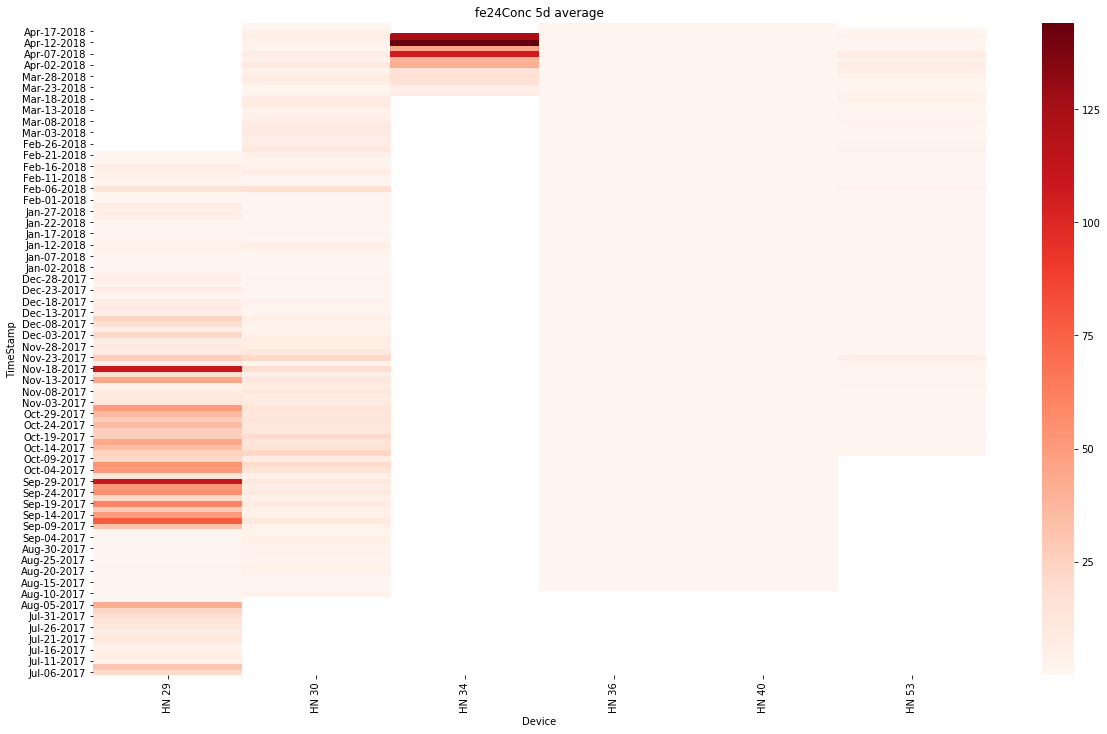

In [83]:
timeperiod = '5d'
xvar = 'fe24Conc'
figl=12;figw=20
cmap = 'Reds'

temp = pd.DataFrame(df_pos.groupby(by=[pd.Grouper(key='TimeStamp',freq=timeperiod),
                                                 'Device'])[xvar].mean()).reset_index()
temp = temp.pivot('TimeStamp','Device',xvar)

fig,ax=plt.subplots(1,1,figsize=(figw,figl))
sns.heatmap(temp,cmap=cmap)
ax.set_yticklabels(temp.reset_index().TimeStamp.dt.strftime('%b-%d-%Y'))
ax.set(title='%s %s average'%(xvar,timeperiod))
plt.setp(ax.xaxis.get_majorticklabels(),rotation=90)
plt.gca().invert_yaxis()
#fig.savefig('%s_%s_%s_heatmap'%(xvar,timeperiod,'mean'),bbox_inches='tight')

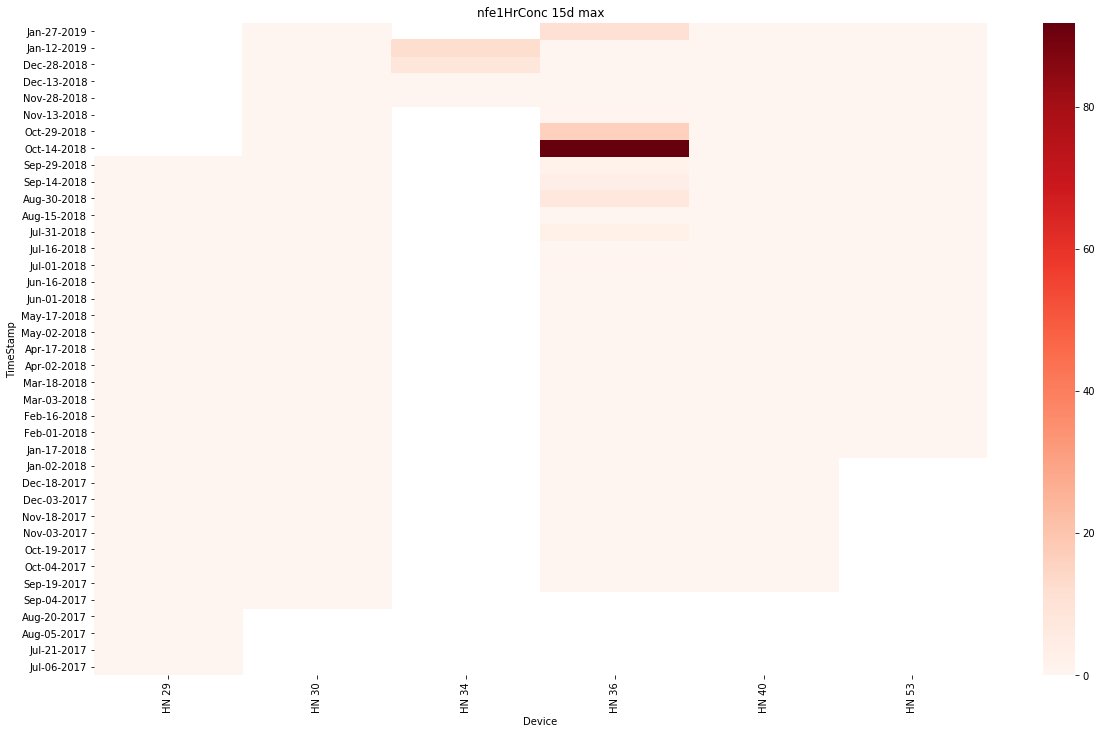

In [78]:
timeperiod = '15d'
xvar = 'nfe1HrConc'
figl=12;figw=20
cmap = 'Reds'

temp = pd.DataFrame(df_pos.groupby(by=[pd.Grouper(key='TimeStamp',freq=timeperiod),
                                                 'Device'])[xvar].max()).reset_index()
temp = temp.pivot('TimeStamp','Device',xvar)

fig,ax=plt.subplots(1,1,figsize=(figw,figl))
sns.heatmap(temp,cmap=cmap)
ax.set_yticklabels(temp.reset_index().TimeStamp.dt.strftime('%b-%d-%Y'))
ax.set(title='%s %s max'%(xvar,timeperiod))
plt.setp(ax.xaxis.get_majorticklabels(),rotation=90)
plt.gca().invert_yaxis()
fig.savefig('%s_%s_%s_heatmap'%(xvar,timeperiod,'max'),bbox_inches='tight')

In [85]:
2600/50

52.0

In [87]:
df_10min['Powerbin'] = pd.cut(df_10min['ActivePower_Avg'],bins=np.arange(0,2600,50))
df_pos['fe24Conc_bin'] = pd.cut(df_pos['fe24Conc'],
                                bins=np.arange(df_pos['fe24Conc'].min(),df_pos['fe24Conc'].max(),(df_pos['fe24Conc'].max()-df_pos['fe24Conc'].min())/52))
df_pos['fe1HrConc_bin'] = pd.cut(df_pos['fe1HrConc'],
                                 bins=np.arange(df_pos['fe1HrConc'].min(),df_pos['fe1HrConc'].max(),(df_pos['fe1HrConc'].max()-df_pos['fe1HrConc'].min())/52))
df_pos['nfe24Conc_bin'] = pd.cut(df_pos['nfe24Conc'],
                                bins=np.arange(df_pos['nfe24Conc'].min(),df_pos['nfe24Conc'].max(),(df_pos['nfe24Conc'].max()-df_pos['nfe24Conc'].min())/52))
df_pos['nfe1HrConc_bin'] = pd.cut(df_pos['nfe1HrConc'],
                                 bins=np.arange(df_pos['nfe1HrConc'].min(),df_pos['nfe1HrConc'].max(),(df_pos['nfe1HrConc'].max()-df_pos['nfe1HrConc'].min())/52))

In [90]:
df_pos['fe24Conc_bin'].unique()

[(0.0, 8.692], (17.384, 26.077], NaN, (8.692, 17.384], (26.077, 34.769], ..., (425.917, 434.609], (434.609, 443.302], (278.15, 286.842], (252.073, 260.766], (260.766, 269.458]]
Length: 52
Categories (51, interval[float64]): [(0.0, 8.692] < (8.692, 17.384] < (17.384, 26.077] < (26.077, 34.769] ... (408.533, 417.225] < (417.225, 425.917] < (425.917, 434.609] < (434.609, 443.302]]

In [93]:
df_pos['TimeStamp_10'] = df_pos['TimeStamp'].dt.round('10min')

In [98]:
df_pos_10min = df_pos.groupby(by='TimeStamp_10').mean().reset_index()
df_pos_10min['fe24Conc_bin'] = pd.cut(df_pos_10min['fe24Conc'],
                                bins=np.arange(df_pos_10min['fe24Conc'].min(),df_pos_10min['fe24Conc'].max(),(df_pos_10min['fe24Conc'].max()-df_pos_10min['fe24Conc'].min())/52))
df_pos_10min['fe1HrConc_bin'] = pd.cut(df_pos['fe1HrConc'],
                                 bins=np.arange(df_pos_10min['fe1HrConc'].min(),df_pos_10min['fe1HrConc'].max(),(df_pos_10min['fe1HrConc'].max()-df_pos_10min['fe1HrConc'].min())/52))
df_pos_10min['nfe24Conc_bin'] = pd.cut(df_pos['nfe24Conc'],
                                bins=np.arange(df_pos_10min['nfe24Conc'].min(),df_pos_10min['nfe24Conc'].max(),(df_pos_10min['nfe24Conc'].max()-df_pos_10min['nfe24Conc'].min())/52))
df_pos_10min['nfe1HrConc_bin'] = pd.cut(df_pos['nfe1HrConc'],
                                 bins=np.arange(df_pos_10min['nfe1HrConc'].min(),df_pos_10min['nfe1HrConc'].max(),(df_pos_10min['nfe1HrConc'].max()-df_pos_10min['nfe1HrConc'].min())/52))

In [99]:
','.join(list(df_pos_10min.columns))

'TimeStamp_10,Windows,dmFeLt100,dmFe100_200,dmFe200_300,dmFe300_400,dmFe400_500,dmFe500_600,dmFe600_700,dmFeGt700,dmNfeLt200,dmNfe200_300,dmNfe300_400,dmNfe400_500,dmNfe500_600,dmNfe600_700,dmNfe700_800,dmNfeGt800,feInstConc,nfeInstConc,fe1HrConc,nfe1HrConc,fe24Conc,nfe24Conc,feAutoCumMass,nfeAutoCumMass,dmRatio_700_200,dmAvg_700_200,dmAvg_700_400,dmAvg_400_200,dmFlowRate,dmBoardTemp,dmFeConcRaw,dmNfeConcRaw,flowMeter,dm1HrFeConcRaw,fe24Conc_bin,fe1HrConc_bin,nfe24Conc_bin,nfe1HrConc_bin'

In [100]:
df_comb = pd.merge(df_10min,df_pos_10min,how='inner',left_on='TimeStamp',right_on='TimeStamp_10') 

In [101]:
df_comb.head()

,TimeStamp,GridVoltage_Avg,GridVoltage_Min,GridVoltage_Max,GridVoltage_StdDev,GridVoltage2_Avg,GridVoltage2_Min,GridVoltage2_Max,GridVoltage2_StdDev,GridVoltage3_Avg,GridVoltage3_Min,GridVoltage3_Max,GridVoltage3_StdDev,GridCurrent_Avg,GridCurrent_Min,GridCurrent_Max,GridCurrent_StdDev,GridCurrent2_Avg,GridCurrent2_Min,GridCurrent2_Max,GridCurrent2_StdDev,GridCurrent3_Avg,GridCurrent3_Min,GridCurrent3_Max,GridCurrent3_StdDev,ApparentPower_Avg,ApparentPower_Min,ApparentPower_Max,ApparentPower_StdDev,ActivePower_Avg,ActivePower_Min,ActivePower_Max,ActivePower_StdDev,ReactivePower_Avg,ReactivePower_Min,ReactivePower_Max,ReactivePower_StdDev,TowerAccX_Avg,TowerAccX_Min,TowerAccX_Max,TowerAccX_StdDev,WindSpd_Avg,WindSpd_Min,WindSpd_Max,WindSpd_StdDev,WindDir_Avg,WindDir_Min,WindDir_Max,WindDir_StdDev,GenSpeed_Avg,GenSpeed_Min,GenSpeed_Max,GenSpeed_StdDev,RotSpeed_Avg,RotSpeed_Min,RotSpeed_Max,RotSpeed_StdDev,GearOilPres_Avg,GearOilPres_StdDev,GenOutlt_CWTemp_Avg,TowerAccY_Avg,TowerAccY_Min,TowerAccY_Max,TowerAccY_StdDev,AmbTemp_Avg,GenWindingTemp1_Avg,GenWindingTemp2_Avg,GearBrgTemp_Avg,NacTemp_Avg,MainBearingTemp_Avg,MainBearingTemp2_Avg,HydrOilTemp_Avg,GenInlt_CWTemp_Avg,BearingBTemp_Avg,BearingATemp_Avg,GBOilTemp_Avg,GearOilPresAI_Avg,GearOilPresAI_Min,GearOilPresAI_Max,GearOilPresAI_StdDev,GenWindingTemp3_Avg,YawError_Avg,YawError_Min,YawError_Max,YawError_StdDev,PitchStatusword1_Avg,PitchStatusword1_Min,PitchStatusword1_Max,PitchStatusword1_StdDev,PitchStatusword2_Avg,PitchStatusword2_Min,PitchStatusword2_Max,PitchStatusword2_StdDev,PitchStatusword3_Avg,PitchStatusword3_Min,PitchStatusword3_Max,PitchStatusword3_StdDev,PitchAlarmword1_Avg,PitchAlarmword1_Min,PitchAlarmword1_Max,PitchAlarmword1_StdDev,PitchAlarmword2_Avg,PitchAlarmword2_Min,PitchAlarmword2_Max,PitchAlarmword2_StdDev,PitchAlarmword3_Avg,PitchAlarmword3_Min,PitchAlarmword3_Max,PitchAlarmword3_StdDev,PitchAng1_Avg,PitchAng1_Min,PitchAng1_Max,PitchAng2_Avg,PitchAng2_Min,PitchAng2_Max,PitchAng3_Avg,PitchAng3_Min,PitchAng3_Max,RefGenSpeed_Avg,RefGenSpeed_Min,RefGenSpeed_Max,RefGenSpeed_StdDev,Operatingstate_Avg,Operatingstate_Min,Operatingstate_Max,Operatingstate_StdDev,GearBrgTemp2_Avg,TrafoTempArea_Coil_Avg,Frequency_Avg,Frequency_Min,Frequency_Max,Frequency_StdDev,TopBoxTemp_Avg,GearOilPresBI_Avg,GearOilPresBI_Min,GearOilPresBI_Max,GearOilPresBI_StdDev,Systemstatus_Avg,Systemstatus_Min,Systemstatus_Max,Systemstatus_StdDev,PitchCurrent1_Avg,PitchCurrent1_Min,PitchCurrent1_Max,PitchCurrent1_StdDev,PitchCurrent2_Avg,PitchCurrent2_Min,PitchCurrent2_Max,PitchCurrent2_StdDev,PitchCurrent3_Avg,PitchCurrent3_Min,PitchCurrent3_Max,PitchCurrent3_StdDev,Device,Powerbin,TimeStamp_10,Windows,dmFeLt100,dmFe100_200,dmFe200_300,dmFe300_400,dmFe400_500,dmFe500_600,dmFe600_700,dmFeGt700,dmNfeLt200,dmNfe200_300,dmNfe300_400,dmNfe400_500,dmNfe500_600,dmNfe600_700,dmNfe700_800,dmNfeGt800,feInstConc,nfeInstConc,fe1HrConc,nfe1HrConc,fe24Conc,nfe24Conc,feAutoCumMass,nfeAutoCumMass,dmRatio_700_200,dmAvg_700_200,dmAvg_700_400,dmAvg_400_200,dmFlowRate,dmBoardTemp,dmFeConcRaw,dmNfeConcRaw,flowMeter,dm1HrFeConcRaw,fe24Conc_bin,fe1HrConc_bin,nfe24Conc_bin,nfe1HrConc_bin
0,2018-06-01,663.30,661.4,665.2,0.80,663.86,662.4,665.8,0.81,663.08,661.4,665.2,0.75,300.28,188,386,48.59,305.32,192,390,48.55,298.77,186,384,48.62,341.73,212.04,440.62,55.92,340.11,211,438,55.63,-33.10,-49,-17,6.00,2.69,0.80,4.51,0.80,5.83,3.25,8.76,0.80,34.22,4.6,63.1,9.39,1003.08,969.6,1035.0,14.70,10.78,10.38,11.17,0.16,1.93,0.12,46.03,0.89,0.23,2.07,0.35,20.60,62.49,62.68,67.68,33.18,37.60,-274.0,29.18,42.97,46.26,48.56,57.03,5.63,4.94,6.22,0.48,63.35,34.39,32.3,38.8,2.55,13083.0,13083,13083,0.0,13083.0,13083,13083,0.0,13083.0,13083,13083,0.0,15360.0,15360,15360,0.0,15360.0,15360,15360,0.0,15360.0,15360,15360,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1330.32,1184.8,1366.9,28.77,15.00,15.0,15.0,0.00,66.19,-274.0,59.97,59.94,59.98,0.01,0,0,0,0,0,11111.0,10,11111,0.0,0.77,0.0,3.2,0.83,1.72,0.0,4.8,1.77,0.10,0.0,0.8,0.27,HN 36,"(

In [117]:
df_comb['TI'] = (df_comb['WindSpd_StdDev']/(df_comb['WindSpd_Avg'] +0.0001))*100
df_comb['GBox_bin'] =pd.cut(df_comb['GBOilTemp_Avg'],bins=np.arange(20,75,5))
df_comb['TI_bin'] =pd.cut(df_comb['TI'],bins=np.arange(10,100,10))
df_comb['Powerbin'] = pd.cut(df_comb['ActivePower_Avg'],bins=np.arange(0,2700,50))

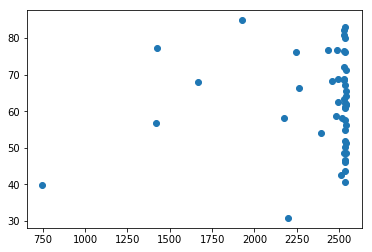

In [105]:
machine = 'HN 29'
temp2 = df_comb[(df_comb['Device']==machine)]
temp = pd.DataFrame(temp2.groupby(by=[pd.Grouper(key='TimeStamp',freq=timeperiod),
                                                 'Device']).max()).reset_index()
plt.scatter(temp['ActivePower_Avg'],temp['TI'],cmap=cmap)

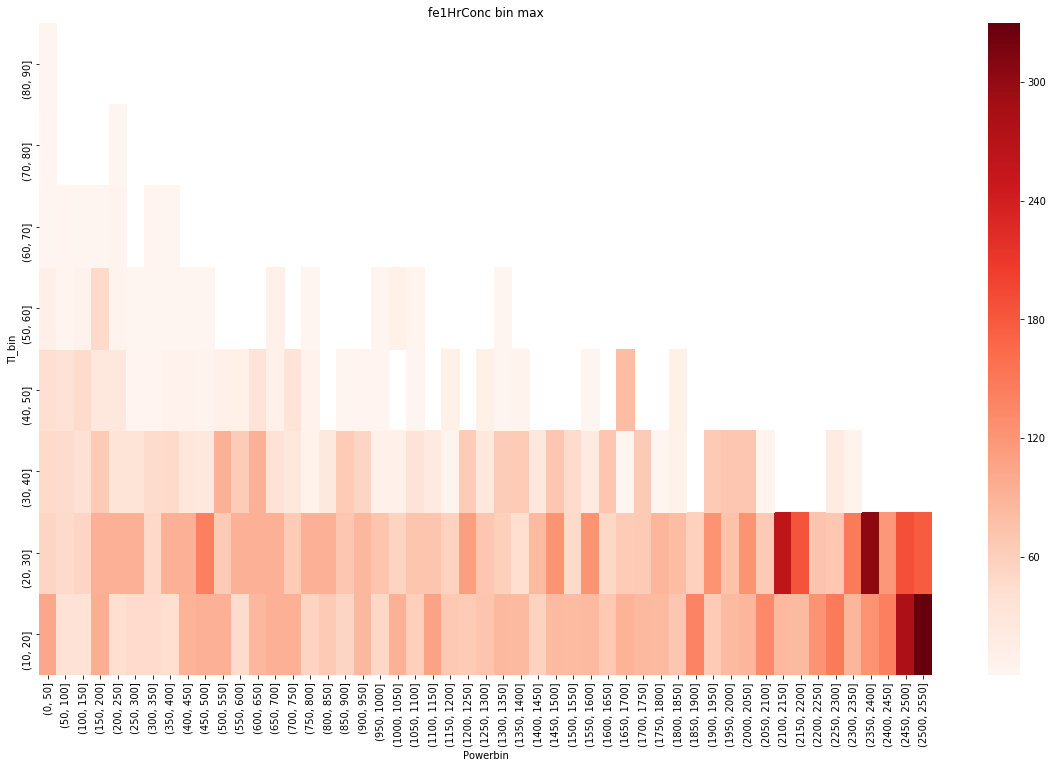

In [142]:
xvar = 'fe1HrConc'
cmap='Reds'
temp = pd.DataFrame(df_comb.groupby(by=['TI_bin','Powerbin'])[xvar].max()).reset_index()
temp = temp.pivot('TI_bin','Powerbin',xvar)

fig,ax=plt.subplots(1,1,figsize=(figw,figl))
sns.heatmap(temp,cmap=cmap)
#ax.set_yticklabels(temp.reset_index().TimeStamp.dt.strftime('%b-%d-%Y'))
ax.set(title='%s %s max'%(xvar,'bin'))
plt.setp(ax.xaxis.get_majorticklabels(),rotation=90)
plt.gca().invert_yaxis()
fig.savefig('%s_%s_%s_heatmap'%(xvar,'PowervsTI','max'),bbox_inches='tight')

In [11]:
df_10min = pd.read_csv('newdata/HINO_10min.csv')
df_pos = pd.read_csv('PoseidonData/HINO_Pos.csv')

df_10min['TimeStamp'] = pd.to_datetime(df_10min['TimeStamp'])
df_pos['TimeStamp'] = pd.to_datetime(df_pos['TimeStamp'])

df_pos['TimeStamp_10'] = df_pos['TimeStamp'].dt.round('10min')



In [12]:

df_pos_10min = df_pos.groupby(by=['Device','TimeStamp_10']).mean().reset_index()
df_pos_10min['fe24Conc_bin'] = pd.cut(df_pos_10min['fe24Conc'],
                                bins=np.arange(df_pos_10min['fe24Conc'].min(),df_pos_10min['fe24Conc'].max(),(df_pos_10min['fe24Conc'].max()-df_pos_10min['fe24Conc'].min())/52))
df_pos_10min['fe1HrConc_bin'] = pd.cut(df_pos['fe1HrConc'],
                                 bins=np.arange(df_pos_10min['fe1HrConc'].min(),df_pos_10min['fe1HrConc'].max(),(df_pos_10min['fe1HrConc'].max()-df_pos_10min['fe1HrConc'].min())/52))
df_pos_10min['nfe24Conc_bin'] = pd.cut(df_pos['nfe24Conc'],
                                bins=np.arange(df_pos_10min['nfe24Conc'].min(),df_pos_10min['nfe24Conc'].max(),(df_pos_10min['nfe24Conc'].max()-df_pos_10min['nfe24Conc'].min())/52))
df_pos_10min['nfe1HrConc_bin'] = pd.cut(df_pos['nfe1HrConc'],
                                 bins=np.arange(df_pos_10min['nfe1HrConc'].min(),df_pos_10min['nfe1HrConc'].max(),(df_pos_10min['nfe1HrConc'].max()-df_pos_10min['nfe1HrConc'].min())/52))
df_pos_10min.rename(columns = {'TimeStamp_10':'TimeStamp'},inplace=True)

In [13]:
df_comb = pd.merge(df_10min,df_pos_10min,how='inner',on=['TimeStamp','Device']) 

In [14]:
df_comb = df_comb[(df_comb['ActivePower_Min']>=5)]

In [32]:
df_comb['TI'] = (df_comb['WindSpd_StdDev']/(df_comb['WindSpd_Avg'] +0.0001))*100
df_comb['GBox_Oil_bin'] =pd.cut(df_comb['GBOilTemp_Avg'],bins=np.arange(20,75,5))
df_comb['TI_bin'] =pd.cut(df_comb['TI'],bins=np.arange(10,100,10))
df_comb['Powerbin'] = pd.cut(df_comb['ActivePower_Avg'],bins=np.arange(0,2700,50))
df_comb['WindSpdbin'] = pd.cut(df_comb['WindSpd_Avg'],bins=np.arange(0,30,2.5))
df_comb['Yaw']=df_comb['WindDir_Avg']-df_comb['YawError_Avg']
df_comb['Yawbin']=pd.cut(df_comb['Yaw'],bins=np.arange(-20,20,2))

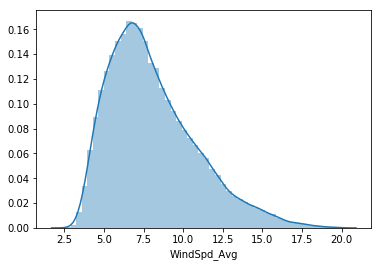

In [33]:
sns.distplot(df_comb['WindSpd_Avg'])

In [34]:
df_comb['Yawbin'].value_counts()

(0, 2]        37984
(-2, 0]       34221
(2, 4]        19704
(-4, -2]      14985
(4, 6]         5785
(-6, -4]       4094
(6, 8]          800
(-8, -6]        676
(8, 10]         149
(-10, -8]       134
(10, 12]         46
(-12, -10]       27
(12, 14]         14
(-14, -12]        5
(14, 16]          3
(-16, -14]        2
(16, 18]          1
(-18, -16]        0
(-20, -18]        0
Name: Yawbin, dtype: int64

In [35]:
xvar = 'fe1HrConc'
cmap='Reds'
figl=12;figw=20

location = 'filtered_by_machineV3/'
if not os.path.exists(location):
    os.makedirs(location)
    
machines = df_comb['Device'].unique()
xvars = ['fe1HrConc','fe24Conc']
for machine in machines:
    temp2 = df_comb[(df_comb['Device']==machine)]
    for xvar in xvars:
        for count in ['avg','max','median']:
            if 'avg':
                temp = temp2.groupby(by=['Powerbin','Yawbin'])[xvar].quantile(0.95).reset_index()
            elif 'median':
                temp = temp2.groupby(by=['Powerbin','Yawbin'])[xvar].median().reset_index()
            else:
                temp = pd.DataFrame(temp2.groupby(by=['Yawbin','Powerbin'])[xvar].max()).reset_index()
            temp['counts'] = temp2.groupby(by=['Yawbin','Powerbin'])[xvar].count().values
            temp = temp[(temp['counts']>5)]
            temp = temp.pivot('Powerbin','Yawbin',xvar)
            try:
                fig,ax=plt.subplots(1,1,figsize=(figw,figl))
                sns.heatmap(temp,cmap=cmap)
                #ax.set_yticklabels(temp.reset_index().TimeStamp.dt.strftime('%b-%d-%Y'))
                ax.set(title='%s %s %s %s'%(machine,xvar,'bin',count))
                plt.setp(ax.xaxis.get_majorticklabels(),rotation=90)
                plt.gca().invert_yaxis()
                fig.savefig('%s%s_%s_%s_%s_heatmap'%(location,machine,xvar,'PowervsYaw',count),bbox_inches='tight')
                plt.close(fig)
            except:
                print(machine,xvar,count)

In [34]:
for machine in df_comb['Device'].unique():
    temp = df_comb[(df_comb['Device']==machine)]
    fig,ax = plt.subplots(1,figsize=(10,10))
    ax.scatter(temp['GBOilTemp_Avg'],temp['fe1HrConc'])
    ax.legend()
    plt.savefig('ScaterGbox_oilvsfe1HrConc_%s.png'%machine,bbox_inches='tight')
    plt.close(fig)

In [13]:
corr_df = df_comb.corr()

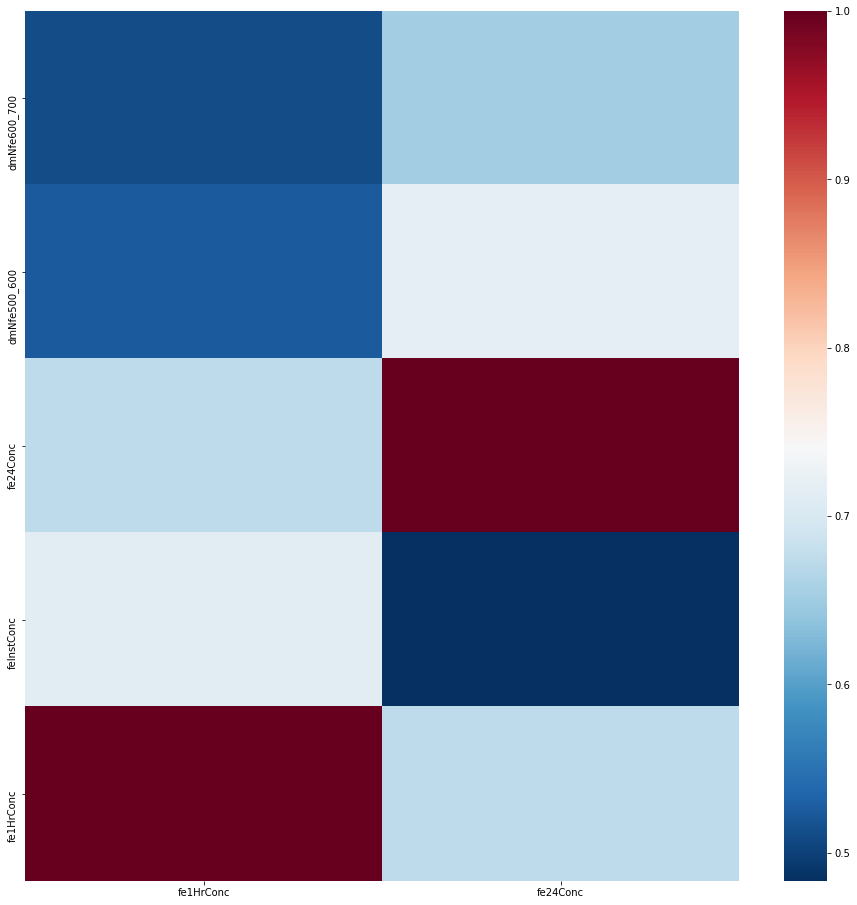

In [14]:
fig,ax = plt.subplots(1,figsize=(16,16))
sns.heatmap(corr_df[['fe1HrConc','fe24Conc']][(corr_df['fe1HrConc']>0.5)].sort_values(by='fe1HrConc'),ax=ax,cmap=plt.cm.RdBu_r)
plt.savefig('Correlatio_plot.png',bbox_inches='tight')

In [39]:
df_comb['Operatingstate_Max'].value_counts()

15.0    112608
12.0     18886
8.1      12171
21.0     10073
25.0      3619
11.0      2691
23.0       310
24.0       239
19.0       234
7.0        107
22.0        58
8.2          9
26.0         7
10.5         2
Name: Operatingstate_Max, dtype: int64

# Specific Region Analysis


In [9]:
machines

array(['HN 36', 'HN 30', 'HN 40', 'HN 53', 'HN 29', 'HN 34'], dtype=object)

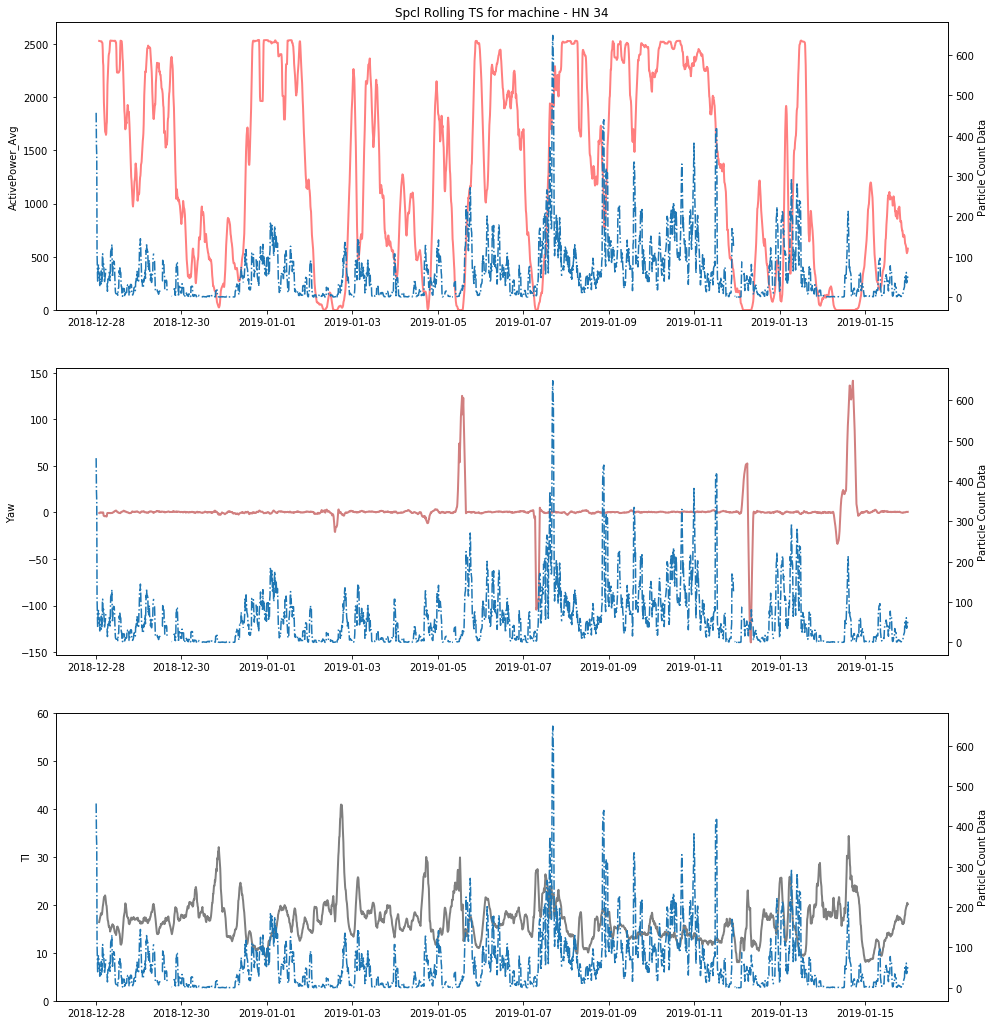

In [10]:

## Config File ###
machines = 'HN 29'
start_time_period = '12-28-2018'
end_time_period = '01-16-2019'

Tenmin_columns =  'ActivePower_Avg,YawError_Avg,WindDir_Avg'
pos_columns = 'fe1HrConc'

Tenmin_columns_same_axes = 'FALSE'
pos_columns_same_axes = 'TRUE'

location = 'SpecialTimeSeriesPlot(V3)/'
rollingmean='FALSE'
rolling_no = 12

## Code Starts ##
if not os.path.exists(location):
    os.makedirs(location)

required_columns_10min = Tenmin_columns.split(',') +['Device','TimeStamp','WindSpd_StdDev','WindSpd_Avg']
required_columns_pos = pos_columns.split(',') +['Device','TimeStamp']
df_10min = pd.read_csv('newdata/HINO_10min.csv',usecols=required_columns_10min)
df_pos = pd.read_csv('PoseidonData/HINO_Pos.csv',usecols=required_columns_pos)

df_10min['TimeStamp'] = pd.to_datetime(df_10min['TimeStamp'])
df_pos['TimeStamp'] = pd.to_datetime(df_pos['TimeStamp'])
df_10min['TI'] = (df_10min['WindSpd_StdDev']/(df_10min['WindSpd_Avg'] +0.0001))*100
df_10min['Yaw'] = df_10min['WindDir_Avg'] -df_10min['YawError_Avg']

df_10min['TimeStamp'] = pd.to_datetime(df_10min['TimeStamp'])
df_pos['TimeStamp'] = pd.to_datetime(df_pos['TimeStamp'])

df_10min = df_10min[(df_10min['TimeStamp']>= pd.to_datetime(start_time_period))&
                   (df_10min['TimeStamp']<= pd.to_datetime(end_time_period))]
df_pos = df_pos[(df_pos['TimeStamp']>= pd.to_datetime(start_time_period))&
                   (df_pos['TimeStamp']<= pd.to_datetime(end_time_period))]

Tenmin_columns =  'ActivePower_Avg,Yaw,TI'

if Tenmin_columns_same_axes == 'TRUE' and pos_columns_same_axes == 'TRUE':
    rtype = 'region1'
    color_idx = np.linspace(0, 1, len(Tenmin_columns.split(',')))
    color_idx2 = np.linspace(0, 1, len(pos_columns.split(',')))
    for machine in machines.split(','):
        temp_10min = df_10min[(df_10min['Device']==machine)]
        temp_pos = df_pos[(df_pos['Device']==machine)]
        fig,ax = plt.subplots(1,figsize = (16,6))

        ax2 = ax.twinx()
        for i, feature in zip(color_idx2,pos_columns.split(',')):
            print(feature)
            ax2.plot(temp_pos['TimeStamp'],temp_pos[feature],'-.',lw=3)
        for i, feature in zip(color_idx,Tenmin_columns.split(',')):
            print(i,feature)
            ax.plot(temp_10min['TimeStamp'],temp_10min[feature],color = plt.cm.autumn(i),lw=2)


        ax.set_title('Spcl TS for machine - %s'%machine)
        fig.legend()
        #ax.legend()
        ax2.set_ylabel('Particle Count Data')
        ax.set_ylabel('Tenmin Data')
        plt.grid()
        fig.savefig(location+'%s_Spcl_ts_%s_%s:%s.png'%(machine,rtype,start_time_period,end_time_period),bboxinches='tight')
        plt.close(fig)

elif Tenmin_columns_same_axes == 'FALSE' and pos_columns_same_axes == 'TRUE':
    rtype='region2'
    color_idx = np.linspace(0, 1, len(Tenmin_columns.split(',')))
    color_idx2 = np.linspace(0, 1, len(pos_columns.split(',')))
    for machine in machines.split(','):
        temp_10min = df_10min[(df_10min['Device']==machine)]
        temp_pos = df_pos[(df_pos['Device']==machine)]
        axes_len = len(Tenmin_columns.split(','))

        fig,ax = plt.subplots(axes_len,1,figsize = (16,6*axes_len))

        ax2  = np.zeros(axes_len,dtype=object)
        count = 0
        for i, feature in zip(color_idx,Tenmin_columns.split(',')):
            ax2[count] = ax[count].twinx()
            for j, feature_pos in zip(color_idx2,pos_columns.split(',')):
                #print(feature)
                ax2[count].plot(temp_pos['TimeStamp'],temp_pos[feature_pos],'-.',lw=1.5)

                #print(i,feature)
            if rollingmean == 'TRUE':
                ax[count].plot(temp_10min['TimeStamp'],temp_10min[feature].rolling(rolling_no).mean(),color = plt.cm.flag(i),lw=2,alpha=0.5)    
            else:
                ax[count].plot(temp_10min['TimeStamp'],temp_10min[feature],color = plt.cm.flag(i),lw=2,alpha=0.5)
            if feature == 'TI':
                ax[count].set_ylim(0,60)
            elif feature == 'GBOilTemp_Avg':
                ax[count].set_ylim(0,65)
            elif feature == 'ActivePower_Avg':
                ax[count].set_ylim(0,2700)
            ax2[count].set_ylabel('Particle Count Data')
            ax[count].set_ylabel(feature)
            count+=1
            #ax2[count].legend()
        if rollingmean == 'TRUE':
            ax[0].set_title('Spcl Rolling TS for machine - %s'%machine)
        else:
            ax[0].set_title('Spcl TS for machine - %s'%machine)
        if rollingmean == 'TRUE':
            fig.savefig(location+'%s_rol_%s_Spcl_ts_%s_%s:%s.png'%(machine,str(rolling_no),rtype,start_time_period,end_time_period),bbox_inches='tight')
        else:
            fig.savefig(location+'%s_Spcl_ts_%s_%s:%s.png'%(machine,rtype,start_time_period,end_time_period),bbox_inches='tight')
        #plt.close(fig)

In [58]:
ax2

array([0, 0, 0, 0], dtype=object)

0.0 ActivePower_Avg
0.3333333333333333 GenSpeed_Avg
0.6666666666666666 GenWindingTemp1_Avg
1.0 PitchAng1_Avg


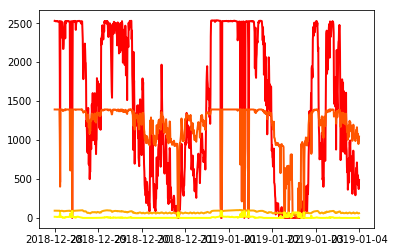

In [48]:
 for i, feature in zip(color_idx,Tenmin_columns.split(',')):
        print(i,feature)
    

In [60]:
i

0.0

In [59]:
ax[i].twinx()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

# Regression Model for predicting Particle Count